# Project Python Foundations: FoodHub Data Analysis

**Marks: 60 points**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [1]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:

 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/Python/foodhub_order.csv') ## Fill the blank to read the data
# Returns the first 5 rows
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [9]:
# Check the shape of the dataset
df.shape ## Fill in the blank

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [7]:
# Checking for missing values in the data
print(df.isnull().sum())  #Write the appropriate function to print the sum of null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [14]:
#Readable decimal numbers
pd.set_option('display.float_format',lambda x:'%3f' % x)

In [15]:
# Get the summary statistics of the numerical data
df.describe(exclude='number').T  ## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


### **Question 5:** How many orders are not rated? [1 mark]

In [16]:
df['rating'].value_counts() ## Complete the code 

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [55]:
df.rating.replace('Not given',np.NAN,inplace=True)
df.rating = df.rating.astype('float')

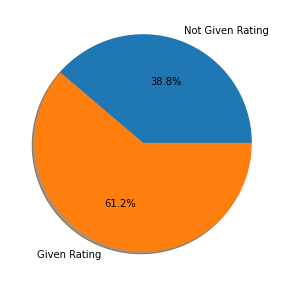

In [56]:
# calculating the sum of all 'NaN' values at 'rating' feature
not_given_r = df.rating.isna().sum()
# calculating the sum of all not 'NaN' values at 'rating' feature
given_r = df.rating.notna().sum()
plt.figure(figsize=(10, 5))
# ploting a pie chat to show the values
plt.pie([not_given_r,given_r], labels=['Not Given Rating','Given Rating'], shadow=True, autopct='%1.1f%%');

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [17]:
# check unique order ID
df['order_id'].nunique()  

1898

#### Customer ID

In [18]:
# check unique customer ID
df['customer_id'].nunique()  ## Complete the code to find out number of unique Customer ID

1200

#### Restaurant name

In [11]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

#### Cuisine type

In [12]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Complete the code to find out  number of  unique cuisine type

14

In [13]:


#function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Set1",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


<Figure size 720x504 with 0 Axes>

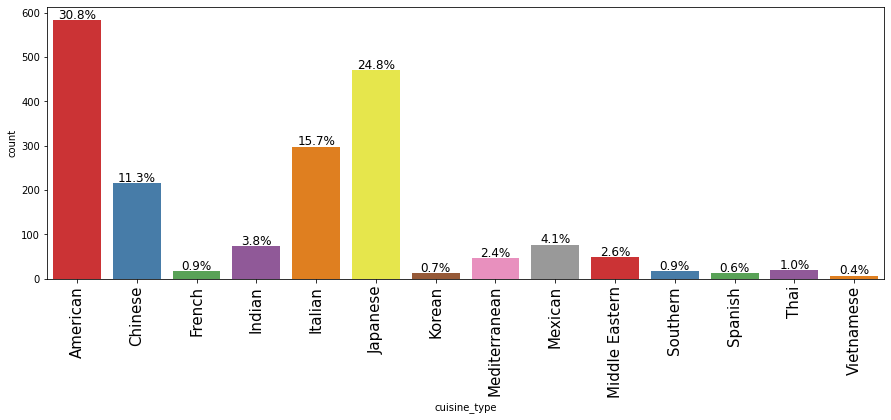

In [14]:


# adjusting the figure to 10x7 size
plt.figure(figsize=(10,7))
# plotting an labeled barplot 'cuisine_type'
labeled_barplot(df, 'cuisine_type', perc=True)



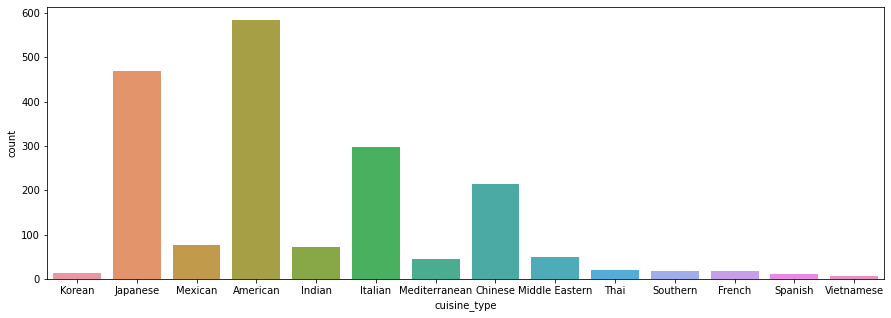

In [8]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.


#### Cost of the order

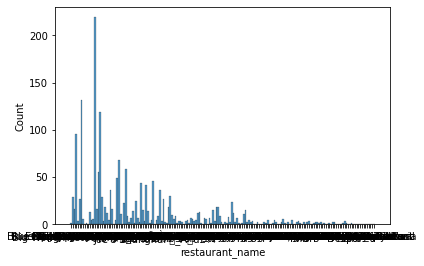

In [26]:
sns.histplot(data=df,x='restaurant_name') ## Histogram for the cost of order
plt.show()


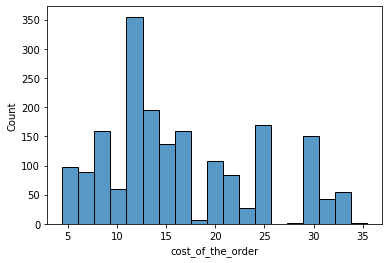

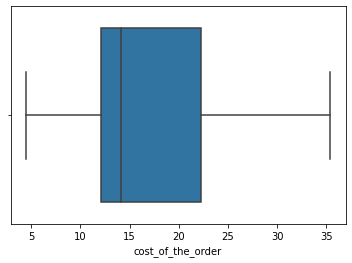

In [27]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show() 

In [25]:
def histogram_boxplot(data, feature, figsize=(10, 5), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,5))
    kde: whether to show the density curve (default True)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="green"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="summer"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    )  # Add median to the histogram

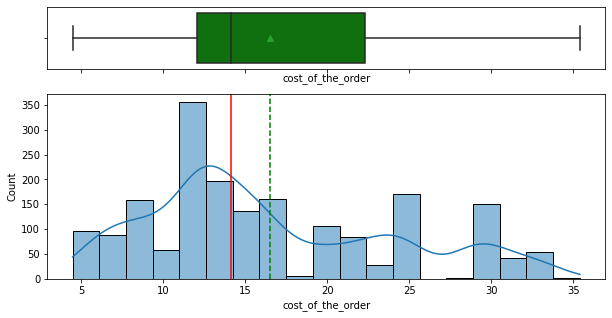

In [26]:
histogram_boxplot(df, 'cost_of_the_order')

#### Day of the week

In [23]:
# # Check the unique values
df['day_of_the_week'].nunique() ## Complete the code to check unique values for the 'day_of_the_week' column

2

<Figure size 720x504 with 0 Axes>

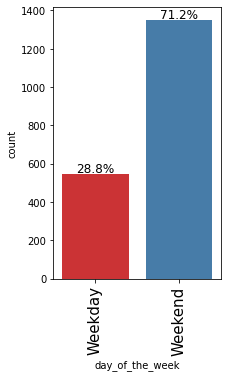

In [15]:

# adjusting the figure to 10x7 size
plt.figure(figsize=(10,7))
# plotting an labeled barplot 'day_of_the_week'
labeled_barplot(df, 'day_of_the_week', perc=True)
 ## Complete the code to plot a bar graph for 'day_of_the_week' column

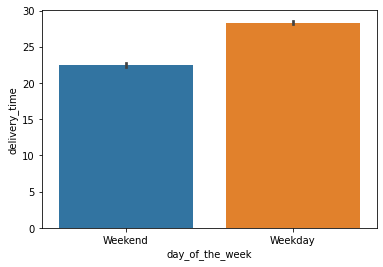

In [81]:
sns.barplot(data = df, x = 'day_of_the_week',y ='delivery_time')
plt.show()


#### Rating

In [25]:
# Check the unique values
df['rating'].nunique()## Complete the code to check unique values for the 'rating' column

4

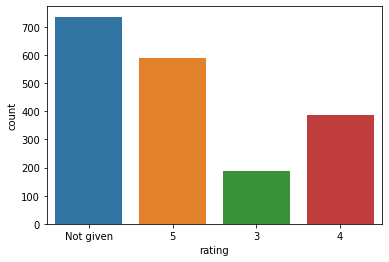

In [26]:
sns.countplot(data = df, x = 'rating') ## Complete the code to plot bar graph for 'rating' column
plt.show()

#### Food Preparation time

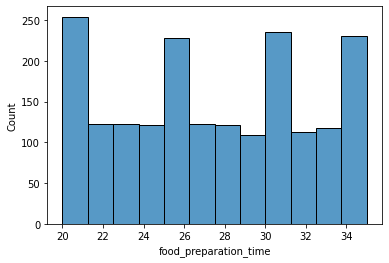

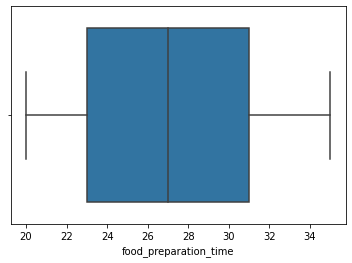

In [29]:
sns.histplot(data=df,x='food_preparation_time') ## Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the cost of order
plt.show()

#### Delivery time

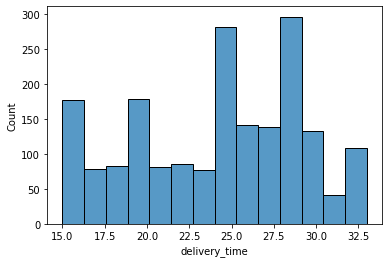

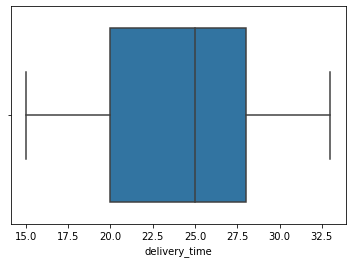

In [28]:
sns.histplot(data=df,x='delivery_time') ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [32]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)## Complete the code


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [8]:
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5) / df.shape[0] * 100

restaurant_name
Shake Shack                  11.538462
The Meatball Shop             6.954689
Blue Ribbon Sushi             6.269758
Blue Ribbon Fried Chicken     5.057956
Parm                          3.582719
Name: order_id, dtype: float64

In [30]:
sns.histplot[data= df,x='restaurant_name'].value_counts().head(5) ## Complete the code to plot the histogram for the delivery time
plt.show()

SyntaxError: ignored

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [52]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].nunique() ## Complete the code to check unique values for the cuisine type on weekend
df.cuisine_type.value_counts().head(5)

American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: cuisine_type, dtype: int64

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [54]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


In [56]:
df[df.cost_of_the_order >20].shape[0]

555

In [55]:
df[df.cost_of_the_order >20].shape[0]/df.shape[0]*100

29.24130663856691

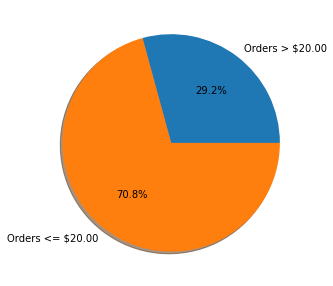

In [26]:
# calculating the sum of orders which cost are greater than 20 dollars
over_20 = df[df.cost_of_the_order > 20]['order_id'].count()
# calculating the sum of orders which cost are lower or equal than 20 dollars.
under_20 = df.shape[0] - over_20
plt.figure(figsize=(10, 5))
# ploting a pie chat to show the values
plt.pie([over_20,under_20], labels=['Orders > $20.00','Orders <= $20.00'], shadow=True, autopct='%1.1f%%');


### **Question 10:** What is the mean order delivery time? [1 mark]

In [9]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [70]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(5)  ## Write the appropriate column name to get the top 5 cmost frequent customers

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

In [69]:
df.cost_of_the_order.max()

35.41

In [71]:
df[df.cost_of_the_order== 35.41]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
573,1477814,62359,Pylos,Mediterranean,35.410000,Weekday,4,21,29,8.852500


In [74]:
df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(10)

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7
82041,7
259341,7
276192,7
60052,6


### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

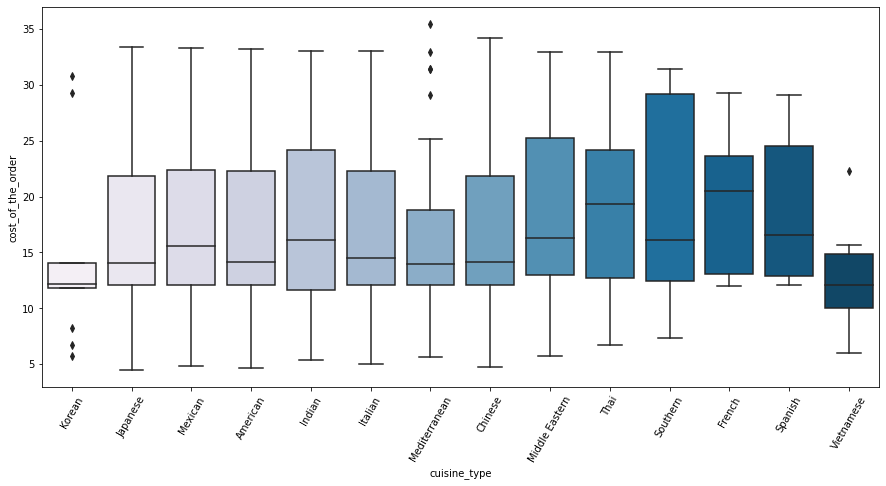

In [39]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

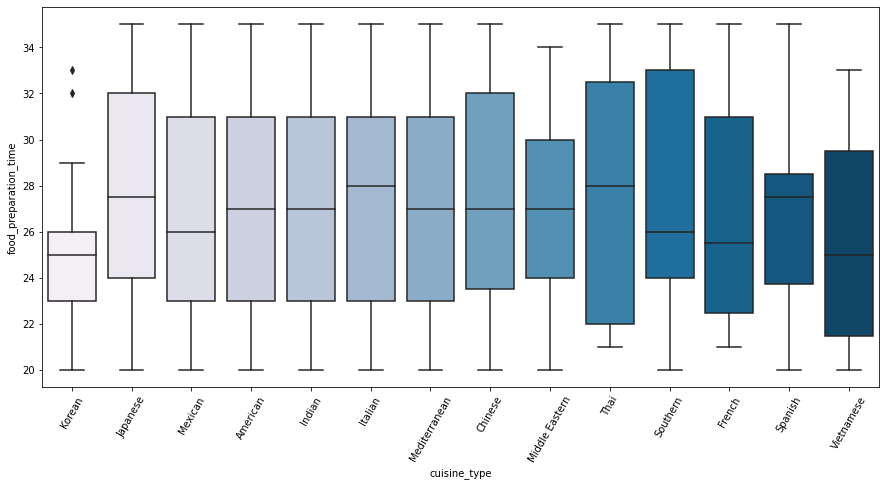

In [40]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

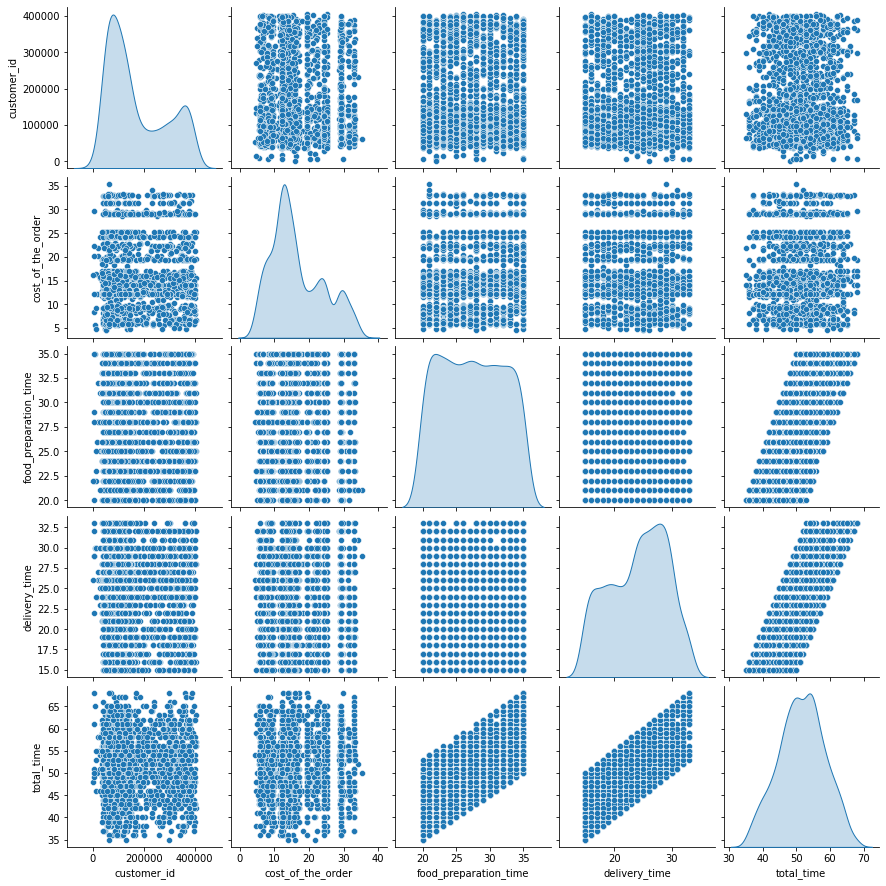

In [97]:
sns.pairplot(data=df_c[num_var], diag_kind="kde")
plt.show()

In [102]:
df_c = df.dropna().reset_index(drop=True).copy()

#### Day of the Week vs Delivery time

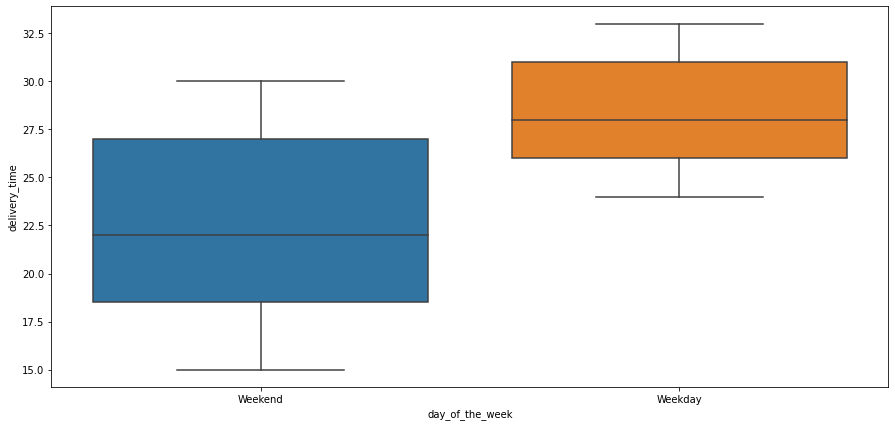

In [77]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)   ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [45]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(15)

restaurant_name
Shake Shack                     3579.530000
The Meatball Shop               2145.210000
Blue Ribbon Sushi               1903.950000
Blue Ribbon Fried Chicken       1662.290000
Parm                            1112.760000
RedFarm Broadway                 965.130000
RedFarm Hudson                   921.210000
TAO                              834.500000
Han Dynasty                      755.290000
Blue Ribbon Sushi Bar & Grill    666.620000
Rubirosa                         660.450000
Sushi of Gari 46                 640.870000
Nobu Next Door                   623.670000
Five Guys Burgers and Fries      506.470000
Momoya                           492.130000
Name: cost_of_the_order, dtype: float64

#### Rating vs Delivery time

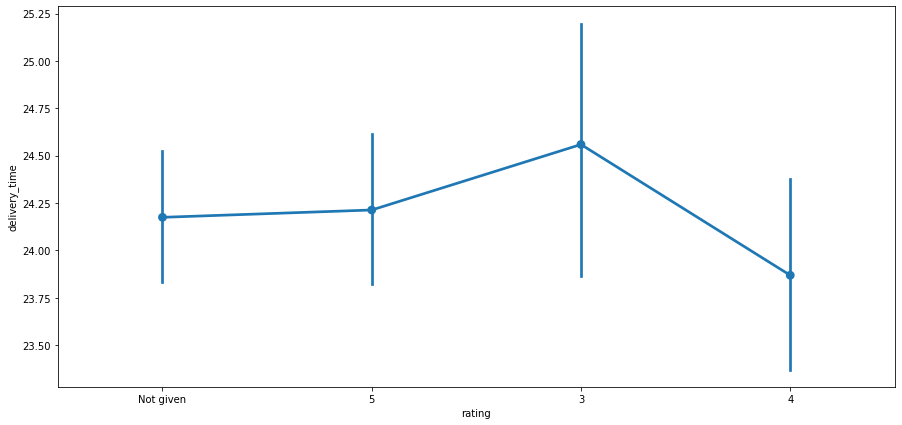

In [29]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs Food preparation time

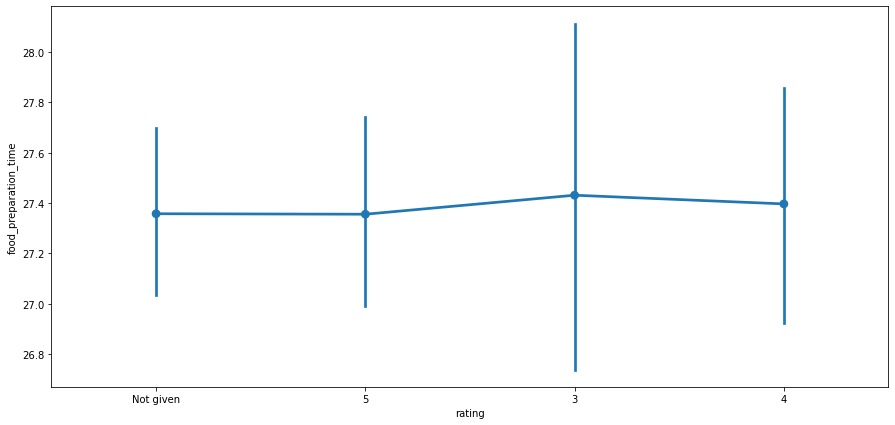

In [44]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Rating vs Cost of the order

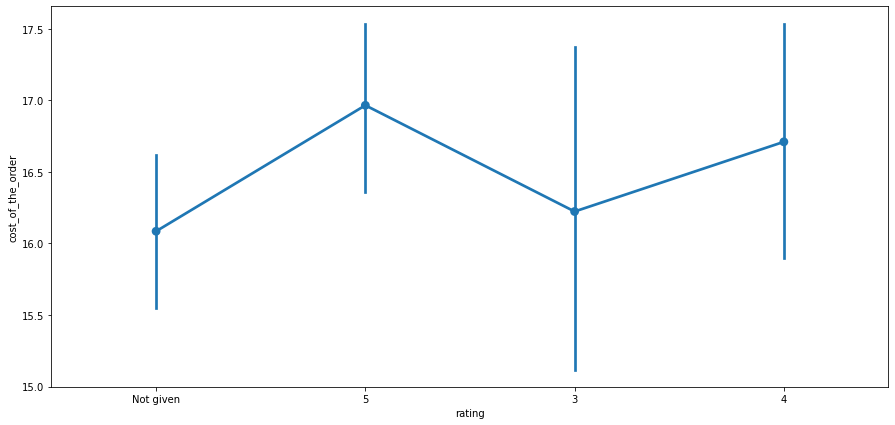

In [46]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

In [15]:
print('Mean food preparation time is {:2.2f} minutes.'.format(df.food_preparation_time.mean()))

Mean food preparation time is 27.37 minutes.


In [14]:
def histogram_boxplot(data, feature, figsize=(10, 5), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,5))
    kde: whether to show the density curve (default True)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="summer"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    )  # Add median to the histogram

In [39]:
df['total_time'] = df.delivery_time + df.food_preparation_time

In [40]:
print('Mean total time is {:2.2f} minutes to have food at hand.'.format(df.total_time.mean()))

Mean total time is 51.53 minutes to have food at hand.


#### Correlation among variables

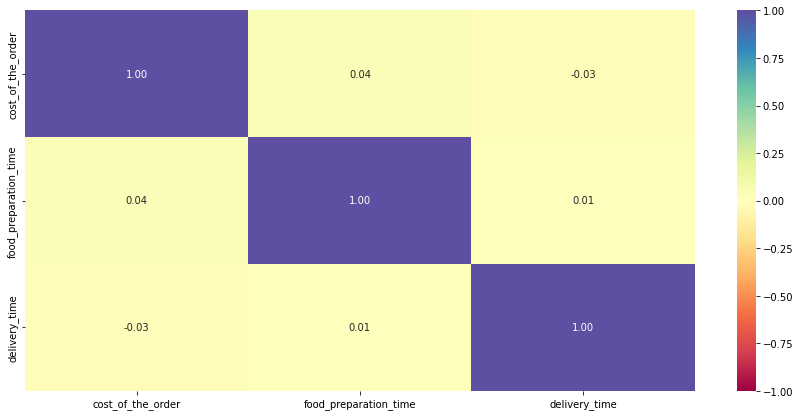

In [74]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [31]:
df_c = df.dropna().reset_index(drop=True).copy()

In [12]:
df['total_time'] = df.delivery_time + df.food_preparation_time

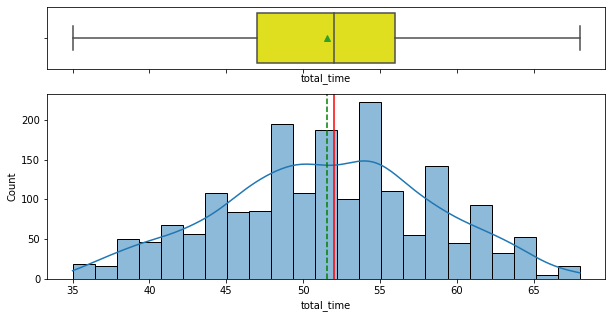

In [16]:
# plotting an histogram and a boxplot for the 'total_time'
histogram_boxplot(df, 'total_time')

In [19]:
df_c = df.dropna().reset_index(drop=True).copy()

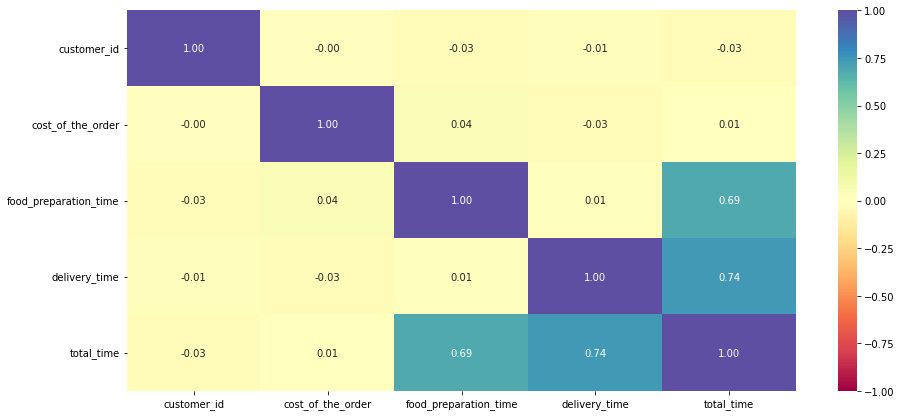

In [31]:
# creating a list of features for further correlation heatmap 
num_var = ['customer_id', 'cost_of_the_order', 'day_of_the_week', 'rating','food_preparation_time', 'delivery_time' , 'total_time']
# a DataFrame with correlation between each pair of numerical features
corr = df_c[num_var].corr()
# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [18]:
df_c = df.dropna().reset_index(drop=True).copy()

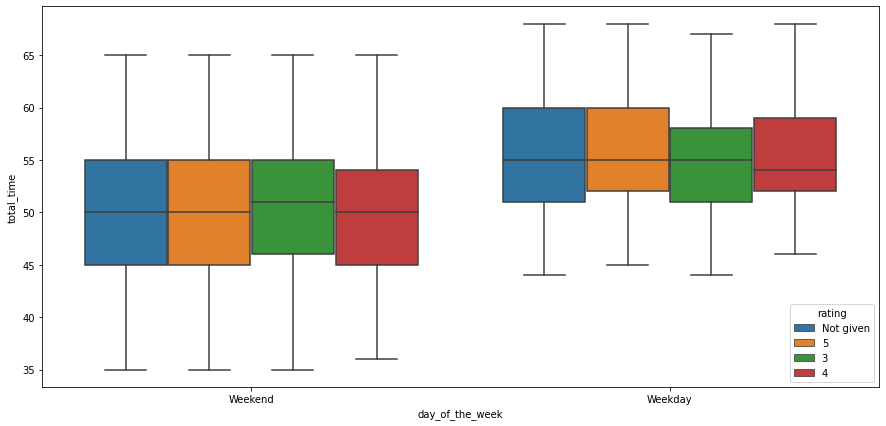

In [72]:
# Boxplot is also useful to see the distribution between two features and a third feature on hue. 
# In this case we are plotting 'day_of_the_week' versus 'total_time' and hue as 'rating' 
plt.figure(figsize=(15,7))
sns.boxplot(data = df_c,y='total_time',x='day_of_the_week', hue=df_c['rating']);

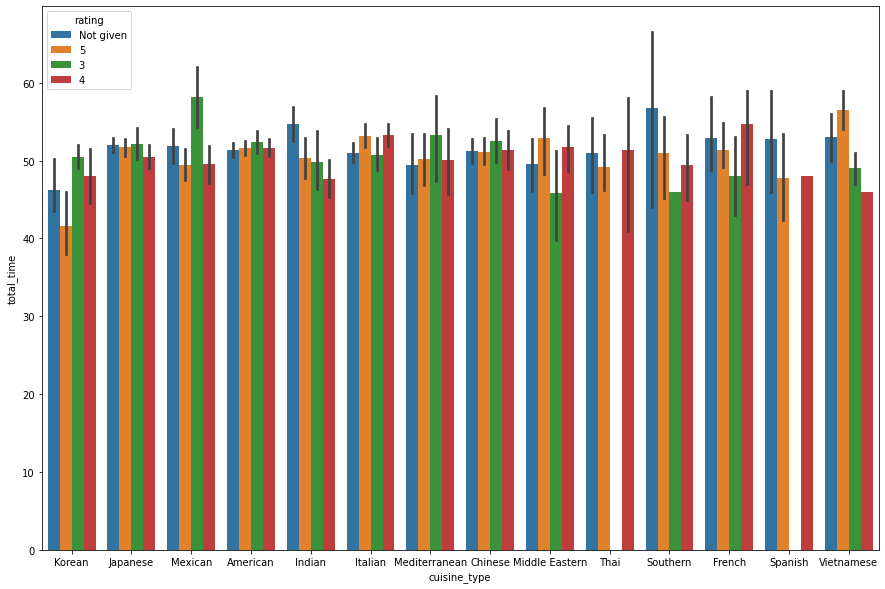

In [40]:
plt.figure(figsize=(15,10))
# Barplot is  useful to see the distribution between two features and a third feature on hue. 
# In this case we are plotting 'cuisine_type' versus 'cost_of_the_order' and hue as 'rating' 
sns.barplot(data = df_c,y='total_time',x='cuisine_type', hue=df_c['rating']);


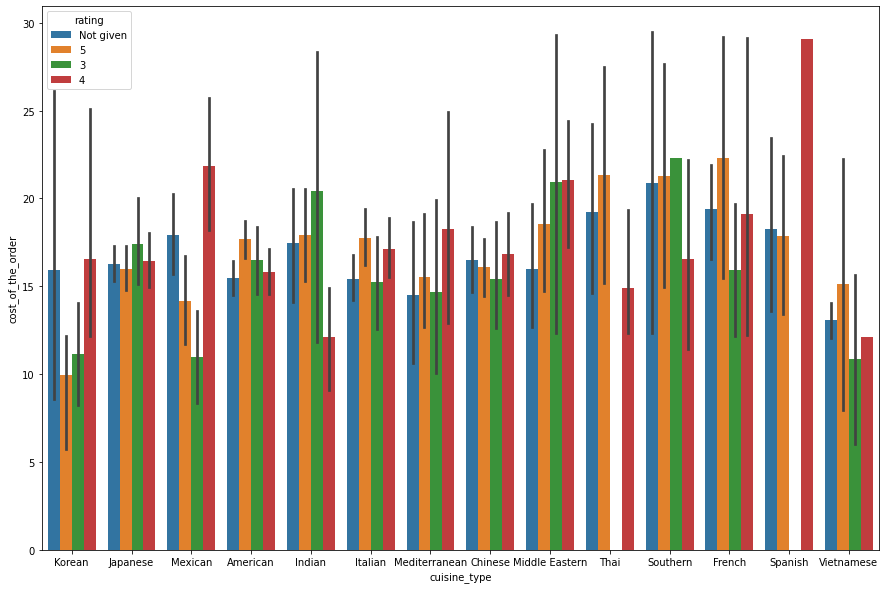

In [9]:


plt.figure(figsize=(15,10))
# Barplot is  useful to see the distribution between two features and a third feature on hue. 
# In this case we are plotting 'cuisine_type' versus 'cost_of_the_order' and hue as 'rating' 
sns.barplot(data = df_c,y='cost_of_the_order',x='cuisine_type', hue=df_c['rating']);



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [145]:
df.rating.replace('Not given',np.NAN,inplace=True)
df.rating = df.rating.astype('float')

In [148]:
df_count = df_c.groupby('restaurant_name')['rating'].count()

In [75]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [117]:

# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']> 50 ]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating




,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [78]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.750000,Weekend,Not given,25,20,7.687500
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080000,Weekend,Not given,25,23,1.812000
2,1477070,66393,Cafe Habana,Mexican,12.230000,Weekday,5,23,28,1.834500
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200000,Weekend,3,25,15,7.300000
4,1478249,76942,Dirty Bird to Go,American,11.590000,Weekday,4,25,24,1.738500


In [77]:
df[df['cost_of_the_order']>20].cost_of_the_order.sum()

14754.91

In [79]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


In [163]:
df['charge'] = df.cost_of_the_order.apply(lambda x : x*0.25 if(x > 20) else x * 0.15 if(x>5)&(x<=20) else 0)

In [164]:
# Now lets properly print the company net revenue just summing the charge value form each row and displaying in currency format
charge_sum = df.charge.sum()
cost_sum = df.cost_of_the_order.sum()
print('Company net revenue generated on all the orders is ${:,.2f}'.format(charge_sum))
print('Sum of all orders is ${:,.2f}'.format(cost_sum))
print('Percentage on the net revenue in the total amount of orders is {:.2%}'.format(charge_sum/cost_sum))

Company net revenue generated on all the orders is $6,166.30
Sum of all orders is $31,314.82
Percentage on the net revenue in the total amount of orders is 19.69%


In [165]:
total_r = df.charge.sum()
f1 = df[df['cost_of_the_order'] > 20]['charge'].sum()
f1p = f1/total_r
f2 = df[(df['cost_of_the_order'] <= 20)&(df['cost_of_the_order'] > 5)]['charge'].sum()
f2p = f2/total_r
f3 = df[df['cost_of_the_order'] <= 5]['charge'].sum()
f3p = f3/total_r
print('Revenue on orders > $20.00: ${:,.2f} which is {:.2%}'.format(f1,f1p))
print('Revenue on orders <= $20.00 and > $5.00: ${:,.2f} which is {:.2%}'.format(f2,f2p))
print('Revenue on orders <= $5.00: ${:,.2f} which is {:.2%}'.format(f3,f3p))

Revenue on orders > $20.00: $3,688.73 which is 59.82%
Revenue on orders <= $20.00 and > $5.00: $2,477.58 which is 40.18%
Revenue on orders <= $5.00: $0.00 which is 0.00%


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [10]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


   
## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
print('Percentage of orders that have more than 60 minutes of total delivery time is {:2.2%}'.format(df['order_id'][df['total_time'] > 60].count() / df.shape[0]))






Percentage of orders that have more than 60 minutes of total delivery time is 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [73]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it

print('The mean delivery time on weekend is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')





The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekend is around 22 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---